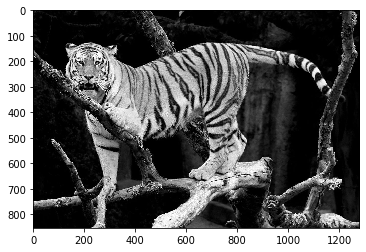

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

im = np.array(Image.open('tiger.jpg'))
imgplot = plt.imshow(im, vmin=0, vmax=255, cmap='gray')

In [2]:
def get_coords(im, W, H):
    h,w = im.shape
    x = np.arange(0,w+1,1) * W/w 
    y = np.arange(0,h+1,1) * H/h 
    return x,y

def interpolation(y0,x0, y1,x1, x):
    frac = (x - x0) / (x1 - x0)
    return y0*(1-frac) + y1 * frac

y0=1
x0=1
y1=3
x1=3
x=2
assert interpolation(y0,x0, y1,x1, x) == 2


def im_interp(im, H,W):
    X = np.zeros(shape=(W,H))
    x, y = get_coords(im, W, H)
    for i,v in enumerate(X):
        y0_idx = np.argmax(y >i) - 1
        for j,_ in enumerate(v):
            # subtracting 1 because this is the first val
            # that is greater than j, want the idx before that
            x0_idx = np.argmax(x > j) - 1
            x1_idx = np.argmax(j < x) 
            
            x0 = x[x0_idx]
            x1 = x[x1_idx]

            y0 = im[y0_idx, x0_idx - 1]
            y1 = im[y0_idx, x1_idx - 1]
            
            X[i,j] = interpolation(y0, x0, y1, x1, j)
    return X
            

def im_resize(im,H,W):
    X_lin = im_interp(im, H,W)
    X = im_interp(X_lin.T, H,W)
    return X_lin, X.T

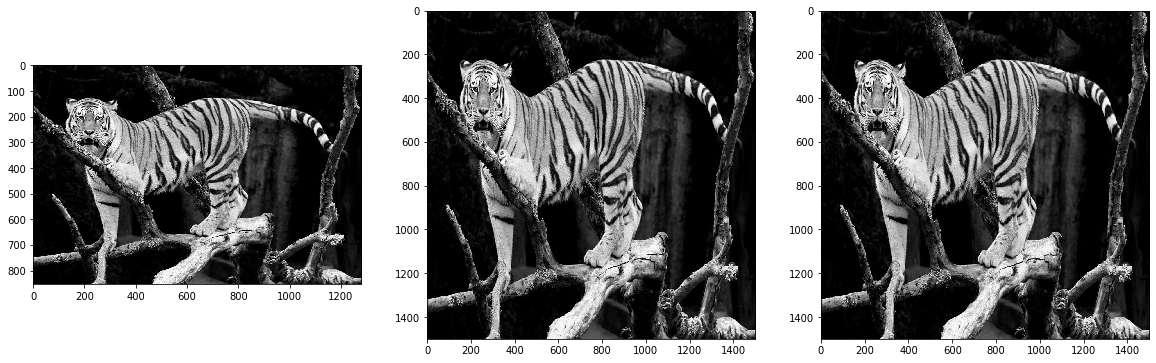

In [3]:
W = H = 1500
X_lin, X = im_resize(im,H,W)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
ax1.imshow(im, vmin=0, vmax=255, cmap='gray')
ax2.imshow(X_lin, vmin=0, vmax=255, cmap='gray')
ax3.imshow(X, vmin=0, vmax=255, cmap='gray')

The above images, from left to right, show the original image, the first interpolation in the x direction and then the bilinear interpolation.  The difference between linear and bilinear interpolation is not detectable from afar, but parts of the image seem sharper in the bilinear interpolation when looking at it closesly, especially the tiger stripes.  Or I have at least convinced myself as much...

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

I = plt.imread('valley.jpg')

# part a
ecdf = ECDF(I.ravel())
I_cdf = np.floor(ecdf(I.ravel()) *255).reshape(I.shape)

# part b
mn = I.min()
mx = I.max()
I_stretch = np.clip((I-mn)/(mn-mx)*255, 0,255)


/home/jfftilton/anaconda3/envs/omsa/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


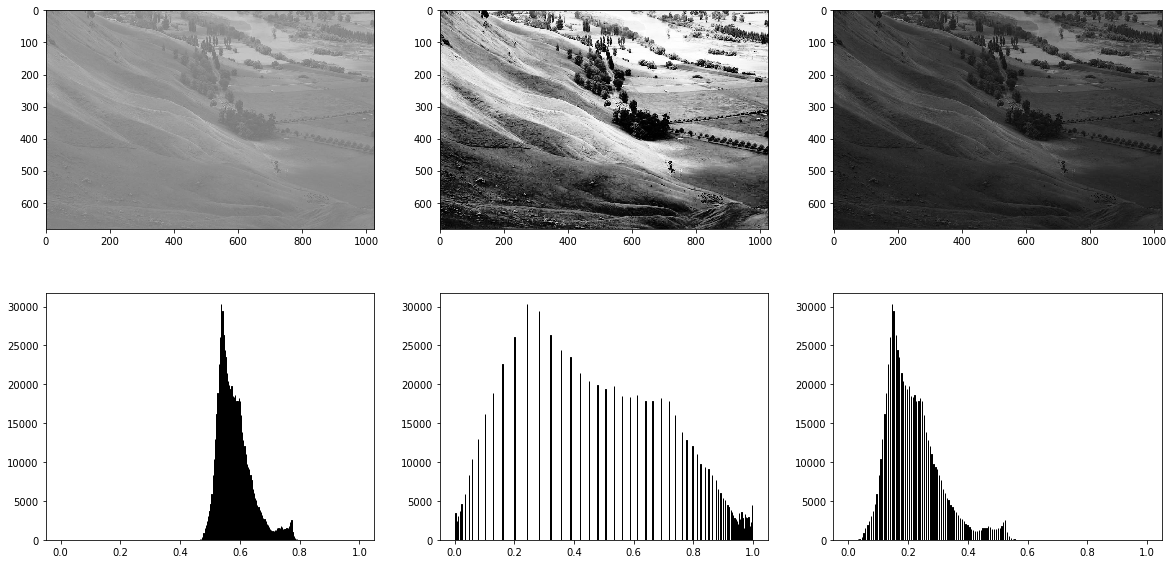

In [11]:
bins = np.arange(0, 1, .001)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))

p1 = ax1.imshow(I, vmin=0, vmax=255, cmap='gray')
p2 = ax2.imshow(I_cdf, vmin=0, vmax=255, cmap='gray')
p3 = ax3.imshow(I_stretch, vmin=0, vmax=255, cmap='gray')
p4 = ax4.hist((I.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')
p5 = ax5.hist((I_cdf.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')
p6 = ax6.hist((I_stretch.ravel()/255), bins=bins, range=(0.0, 1.0), fc='k', ec='k')

The above images from left to right are the image, histogram pair of the original image, the transformed image $T=floor(255xcdf)$, and the histogram stretched image.